<a href="https://colab.research.google.com/github/Elisabeth-Engering/github-slideshow/blob/main/ResponsibleandExplainableAI/DataLabs/CB_21-22C_OpenImages3_210811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Responsible AI: Open Images V4__

For this exercise, you are going to work with the Open Images V4 data:

> Open Images is a dataset of ~9M images that have been annotated with image-level labels and object bounding boxes. The training set of V4 contains 14.6M bounding boxes for 600 object classes on 1.74M images, making it the largest existing dataset with object location annotations. The boxes have been largely manually drawn by professional annotators to ensure accuracy and consistency. The images are very diverse and often contain complex scenes with several objects (8.4 per image on average). Moreover, the dataset is annotated with image-level labels spanning thousands of classes.

We will perform an Exploratory Data Analysis (EDA) to identify (potential) instances of bias. Furthermore, you will learn to apply various fairness metrics, and debiasing techniques such as removing ('fairness through unawareness'), adding, and transforming images ('fairness through awareness') to the Open Images V4 dataset. 

__Documentation:__
- [Open Images](https://storage.googleapis.com/openimages/web/index.html)
- [OIDv4 ToolKit](https://github.com/EscVM/OIDv4_ToolKit)

__Learning Objectives:__
1. Identify, and describe (potential) instances of bias in the Open Images V4 dataset
2. Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset


## __Learning Objective 1: Identify, and describe (potential) instances of bias in the Open Images V4 dataset__


### __Load the meta data__

Before you start with the exercises, it is good practice to create a virtual environment because it will allow you to install packages and modify your Python environment without fear of breaking packages installed in other environments. For more information on how to create such an environment, see the Anaconda tutorial [Managing Environments](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html). 

__Step 1:__ Install, and subsequently import the necessary Python packages, set your working directory, and load the data files containing the class descriptions and labels.

Data sources (via USB or cloud storage link, ask lecturer):
- class-descriptions
- train-annotations-human-imagelabels




In [ ]:
# Load necessary packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100) # Makes sure all columns get displayed
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import cv2
import io
import skimage.io
import imageio

# Load data
class_descriptions = pd.read_csv(r"C:\Users\lisae\Data\OpenImages Human Train Labels\class-descriptions.csv"); # Reads in the csv file as a DataFrame
train_annotations_human_imagelabels = pd.read_csv(r"C:\Users\lisae\Data\OpenImages Human Train Labels\train-annotations-human-imagelabels.csv"); # Reads in the csv file as a DataFrame

### __Merge the meta data__

The table ```train-annotations-human-imagelabels``` contain information on the image ids, and class labels of the Open Images V4 dataset. The corresponding class descriptions can be found in the ```class-descriptions``` table. Merging the two tables will increase the interpretability of the data: As a human being, a class description (e.g. ```wedding```) is generally more informative than a class label (e.g.```'/m/081hv'```).
   
__Step 2:__ Merge the ```class-descriptions``` and ```train-annotations-human-imagelabels``` tables, and name it ``` train_label_description ```.

In [ ]:
print('Columns of class_descriptions.columns:', class_descriptions.columns) # Prints columns of the DataFrame
print(' ') # Prints empty row
print('Columns of train_annotations_human_imagelabels:', train_annotations_human_imagelabels.columns) # Prints columns of the DataFrame

Columns of class_descriptions.columns: Index(['LabelName', 'Description'], dtype='object')
 
Columns of train_annotations_human_imagelabels: Index(['ImageID', 'Source', 'LabelName', 'Confidence'], dtype='object')


In [ ]:
# Merge the data
train_label_description = pd.merge(class_descriptions, train_annotations_human_imagelabels, 
                                   how='left', on='LabelName') # Does a left merge on the column 'LabelName'

# Print the DataFrame
print(train_label_description) # Prints DataFrame

            LabelName       Description           ImageID        Source  \
0         /m/0100nhbf  Sprenger's tulip  00017c3c4989432b  verification   
1         /m/0100nhbf  Sprenger's tulip  00020d41f719ec78  verification   
2         /m/0100nhbf  Sprenger's tulip  000492aa3eb327d4  verification   
3         /m/0100nhbf  Sprenger's tulip  0004b368eabc26db  verification   
4         /m/0100nhbf  Sprenger's tulip  0007c5e6448297b8  verification   
...               ...               ...               ...           ...   
27887034     /m/0zvk5            Helmet  ffef3e3e3ecec097  verification   
27887035     /m/0zvk5            Helmet  fff7c7593ded46c6  verification   
27887036     /m/0zvk5            Helmet  fff7fc0b862a971b  verification   
27887037     /m/0zvk5            Helmet  fffaa9687bd7f700  verification   
27887038     /m/0zvk5            Helmet  ffffda81903d6bb7  verification   

          Confidence  
0                0.0  
1                0.0  
2                0.0  
3      

### __Exploratory Data Analysis (EDA) on the metadata, Part 1__

__Step 3:__ Perform an Exploratory Data Analysis (EDA) on the table ``` train_label_description ```, and visualize your findings.<br>
<br>
Tip: Need inspiration for your EDA, check Kaggle's [Inclusive Images Challenge](https://www.kaggle.com/c/inclusive-images-challenge/data?select=train_human_labels.csv). 

In [ ]:
# Display Shape and Data types of the DataFrame
print(train_label_description.shape) # Prints shape (dimensions) of the DataFrame
print('') # Prints empty row
print(train_label_description.dtypes) # Prints data types (classes) of the columns

(27887039, 5)

LabelName       object
Description     object
ImageID         object
Source          object
Confidence     float64
dtype: object


By printing out the shape (dimensions) of the DataFrame, we can see that the dataset has 27.887.093 observations and 5 features and one of the features of the DataFrame is the target variable.<br>
<br>
By printing out the data types (classes) of the columns of the DataFrame, we can see that our dataset has a combination of categorical (object) and numeric (float) features. The most common data type (class) in the DataFrame is categorical (object).

In [ ]:
# Display DataFrame
print(train_label_description.head()) # Prints the first 5 rows
print('') # Prints empty row
print(train_label_description.tail()) # Prints the last 5 rows
print('') # Prints empty row
print(train_label_description.sample(5)) # Prints 5 random rows

     LabelName       Description           ImageID        Source  Confidence
0  /m/0100nhbf  Sprenger's tulip  00017c3c4989432b  verification         0.0
1  /m/0100nhbf  Sprenger's tulip  00020d41f719ec78  verification         0.0
2  /m/0100nhbf  Sprenger's tulip  000492aa3eb327d4  verification         0.0
3  /m/0100nhbf  Sprenger's tulip  0004b368eabc26db  verification         0.0
4  /m/0100nhbf  Sprenger's tulip  0007c5e6448297b8  verification         0.0

         LabelName Description           ImageID        Source  Confidence
27887034  /m/0zvk5      Helmet  ffef3e3e3ecec097  verification         1.0
27887035  /m/0zvk5      Helmet  fff7c7593ded46c6  verification         0.0
27887036  /m/0zvk5      Helmet  fff7fc0b862a971b  verification         1.0
27887037  /m/0zvk5      Helmet  fffaa9687bd7f700  verification         0.0
27887038  /m/0zvk5      Helmet  ffffda81903d6bb7  verification         0.0

           LabelName      Description           ImageID        Source  \
507179     /m

By printing out rows of the DataFrame I have gained new insights about the column names making sence with the data insight them and that there are no significant missing values (NaN) sighted.

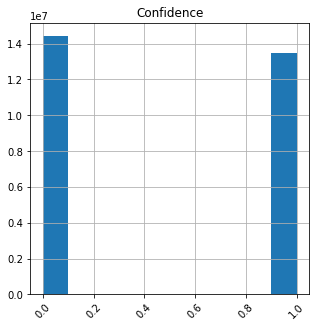

         Confidence
count  2.788682e+07
mean   4.820688e-01
std    4.996784e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


In [ ]:
# Vizualize numeric feature
train_label_description.hist( # Plots a histogram of the data’s numeric features in a grid
    figsize=(5,5), # Increases the grid size
    xrot=45) # Rotates the x-axis by 45 degrees
plt.show() # Shows plot

# Summary statistics of the numerical features
print(train_label_description.describe()) # Prints summary statistics

By visualizing the numeric feature in the DataFrame I can see possible outliers that cannot be explained or might be measurement errors, numeric features that should be categorical and Boundaries that do not make sense. From the histogram, I noted that there are more 0.0 confidences then 1.0. 

In [ ]:
# Summary statistics of the categorical features
print(train_label_description.describe(include='object')) # Prints summary statistics

        LabelName Description           ImageID        Source
count    27887039    27887025          27886817      27886817
unique      19995       19698           5654987             2
top     /m/01g317      Person  00006af3eaaad9b6  verification
freq       906091      906091               544      22343544


By printing out the summary statistics of the categorical features, we get the count of the values of each feature, the number of unique classes, the top most frequent class, and how frequently that class occurs in the data set. 

__Step 3:__ Subset the data by selecting one value (i.e. class) in the column ```LabelName``` located within the table  ```train_label_description```. Name the table ```subset```.

__Examples:__

LabelName|Description
:-----:|:-----:
'/m/03bt1vf'| woman
'/m/01f43'| beauty
'/m/019nj4'| smile
'/m/0fczf'| nurse
'/m/0fsbk0'| health care practitioner
'/m/027qf2'| chemical engineer
'/m/02fbcn'| bartender
'/m/081hv'| wedding

<br>You can also use other tools to filter through the ```class-descriptions``` table. For example, I personally like to use Microsoft Excel (do not tell Nitin or Bram, they will probably laugh at me...) to find interesting classes.  

In [ ]:
# Subset data
subset = train_label_description[
    train_label_description['Description'] == 'Student'] # Selects of a specific column containing a value
print(subset) # Prints DataFrame

        LabelName Description           ImageID        Source  Confidence
426927  /m/014cnc     Student  00003e2837c7b728  verification         0.0
426928  /m/014cnc     Student  0000599864fd15b3  verification         0.0
426929  /m/014cnc     Student  000060e3121c7305  verification         0.0
426930  /m/014cnc     Student  0000c7640c802faf  verification         0.0
426931  /m/014cnc     Student  0000d6d1c44decb6  verification         0.0
...           ...         ...               ...           ...         ...
427748  /m/014cnc     Student  edd5b6e5d5d8cc6b  verification         1.0
427749  /m/014cnc     Student  f019900f98a9ee8a  verification         1.0
427750  /m/014cnc     Student  fb8d8f0bbdf3f5d0  verification         0.0
427751  /m/014cnc     Student  ff4243eb2b686392  verification         1.0
427752  /m/014cnc     Student  ff6966196a9940be  verification         0.0

[826 rows x 5 columns]



__Step 4:__ Merge the tables ```subset``` and```train_label_description``` to match the format:

ImageID|Source_x|LabelName_x|Confidence_x|Description_x|LabelName_y|Confidence_y|Description_y
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
000002b66c9c498e|crowdsource-verification|/m/01kcnl|1|Birthday|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/010l12|0|Roller coaster|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/012c4n|0|Cucurbita|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/012mj|1|Alcoholic beverage|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/012yh1|1|Style|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/014j1m|0|Apple|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/014l8n|0|Yogurt|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/014sv8|1|Human eye|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/01599|0|Beer|/m/081hv|0|Wedding

<br>Name you newly merged table ```train_[fill in class description value]```. 

<br>The table should include a column filled with your chosen class label value (i.e. ```LabelName_y```), and another column containing the additional class labels (i.e. ```Description_x```) associated with a particular image (i.e. ```ImageID```). 

In [ ]:
# Merge the data
train_Student = pd.merge(subset, train_label_description, 
                                   how='inner', on='ImageID') # Does a inner merge on the column 'ImageID'

# Print the DataFrame
print(train_Student) # Prints DataFrame

      LabelName_x Description_x           ImageID      Source_x  Confidence_x  \
0       /m/014cnc       Student  00003e2837c7b728  verification           0.0   
1       /m/014cnc       Student  00003e2837c7b728  verification           0.0   
2       /m/014cnc       Student  00003e2837c7b728  verification           0.0   
3       /m/014cnc       Student  00003e2837c7b728  verification           0.0   
4       /m/014cnc       Student  00003e2837c7b728  verification           0.0   
...           ...           ...               ...           ...           ...   
36797   /m/014cnc       Student  ff4243eb2b686392  verification           1.0   
36798   /m/014cnc       Student  ff4243eb2b686392  verification           1.0   
36799   /m/014cnc       Student  ff4243eb2b686392  verification           1.0   
36800   /m/014cnc       Student  ff4243eb2b686392  verification           1.0   
36801   /m/014cnc       Student  ff6966196a9940be  verification           0.0   

       LabelName_y  Descrip

As you may have noticed the data contains a column ```Confidence[_x/y]```, which includes positive as well as negative label values (1 and 0 confidence respectively. 

> ... Positive labels are classes that have been verified to be in the image while negative labels are classes that are verified to not be in the image. Negative labels are useful because they are generally specified for classes that you may expect to appear in a scene but do not. For example, if there is a group of people in outfits on a field, you may expect there to be a ball. If there isn’t one, that would be a good negative label ([Source](https://medium.com/voxel51/loading-open-images-v6-and-custom-datasets-with-fiftyone-18b5334851c3)).

A negative label can be an indication that there is bias present in the dataset. When you take a look at the wedding example, the value 'Ivory' is common in the case of a negative ```Confidence_y``` value. In other words, when the human annotator encounters an image with a ```Description_x``` value of 'Ivory' he/she is likely to incorrectly label ```Description_y``` as 'wedding' (i.e. false positive). In a traditional western wedding, the bride often dresses in white/ivory etc. But, that does not mean that all brides adhere to this clothing tradition. Take a country like Marocco, where some brides wear a Lebsa lfasiya:

>Lebsa lfasiya is the traditional dress from the Fez region, also called "ebsa lekbira" (the great outfit). Its large size and shape and accompanying elaborate jewelry characterize this type of wedding dress. It can be white, red, or green ([Source](https://www.moroccoworldnews.com/2020/07/310720/marrying-love-and-fashion-wedding-dresses-in-morocco)).

<img src="https://www.moroccoworldnews.com/wp-content/uploads/2020/07/Marrying-Love-Fashion-Wedding-Dresses-and-Morocco.jpg" alt="drawing" width="400"/>

*Figure 1. A woman wearing a traditional Maroccan wedding dress called a Lebsa lfasiya.*

Quite different from a traditional western wedding dress, right?

__Step 5:__ Subset the data into two datasets: one where the value of ```Confidence_y```  equals 0 named ```[fill in class description value]_negative``` , and another where the value of ```Confidence_y``` equals 1 named ```[fill in class description value]_positive```. Count the most common ```Description_x``` values for both subsets. Visualize your results. 

In [ ]:
# Subset the data into two datasets
Student_positive = train_Student.loc[( # Creates dataset were value equals 1
    train_Student['Confidence_x'] == 1) & (
    train_Student['Confidence_y'] == 1)] 

Student_negative = train_Student.loc[( # Creates dataset were value equals 0 
    train_Student['Confidence_x'] == 0) & ( # Bias
    train_Student['Confidence_y'] == 1)] # All other labels

# Count the most common Description_x values for subsets
print(Student_positive['Description_x'].value_counts()) # Prints count
print('') # Prints empty row
print(Student_negative['Description_x'].value_counts()) # Prints count

Student    3050
Name: Description_x, dtype: int64

Student    7303
Name: Description_x, dtype: int64


In [ ]:
# Count the most common Description_y values for subsets
print(Student_positive['Description_y'].value_counts()) # Prints count
print('') # Prints empty row
print(Student_negative['Description_y'].value_counts()) # Prints count

Student        280
Smile           82
Person          74
Education       66
Clothing        62
              ... 
Fedora           1
Cowboy hat       1
Knit cap         1
Trench coat      1
Dress            1
Name: Description_y, Length: 498, dtype: int64

Person              145
Smile               144
Clothing            102
Woman                87
Man                  86
                   ... 
Fête                  1
Carnival              1
Tribe                 1
Costume hat           1
Angel's trumpets      1
Name: Description_y, Length: 1340, dtype: int64


__Step 6:__ Did you find any instance of bias in the Open Images V4 dataset? If your answer is 'No', you need to dig deeper into the data! Elaborate on your answer.

<font color='salmon'> To find instances of bias in the Open Images V4 dataset I will use three steps. This workflow (Discovering Biases in Image Datasets with the Crowd, n.d.) is further augmented by back-end text processing techniques to deal with the noisy inputs from the crowd. The preliminary results suggest that this workflow is promising in uncovering potential biases in visual datasets, that is why I chose to use it.<br>
<br>
1. Inspect random samples of images from the dataset and describe their similarity;
2. Review separate random samples of images from the dataset and provide answers to questions solicited
from the previous step;
3. Judge whether statements of the image dataset that are automatically generated using the questions and answers collected accurately reflect the real world.</font> 

<font color='salmon'> **Inspect random samples of images from the dataset and describe their similarity**<br>
<br>
I started with creating a code that will open up a tab with a random image from the ".\\Student\\" folder on my computer that contains downloaded Images using OIDv4 Toolkit.</font> 

In [ ]:
# Load required packages
import random
import os

path = ".\\Student\\" # Stores path to folder
files = os.listdir(path) # Returns list with all names of the images in folder
d = random.choice(files) # Return a random image from the list
os.startfile(path + d) # Opens new tab with random image of the folder

<font color='salmon'> By running the code five times in a row, it gives me five images chosen at random from the ".\Student\" folder on my computer that contains downloaded Images using OIDv4 Toolkit.<br> 
<br>
When you look at the five images chosen at random, you can see that they have some similarity:
- Include multiple humans;
- Include technology;
- Mostly include humans with a light skintone and dark hair;
- Humans sitting next or across from each other.</font> 

![613a969c71f65be8.jpg](attachment:613a969c71f65be8.jpg)
*Image 1*

![f12de81b2b2a7d79.jpg](attachment:f12de81b2b2a7d79.jpg)
*Image 2*

![003185aacd1c0be9.jpg](attachment:003185aacd1c0be9.jpg)
*Image 3*

![32ef8d7ac81981a6.jpg](attachment:32ef8d7ac81981a6.jpg)
*Image 4*

![621989719561c18d.jpg](attachment:621989719561c18d.jpg)
*Image 5*

<font color='salmon'> **Review separate random samples of images from the dataset and provide answers to questions solicited from the previous step**<br>
<br>
When we look at the similarities in the images, we can create the following questions:
1. How many humans does the image include?
2. What technology does the image include?
3. How do the humans in the image look like?
4. How are the humans sitting in the image?
5. What does the image include besides humans and technology?<br>
<br>  
Image 1
- The image includes two humans;
- The image includes a monitor with a keyboard and a mouse pad;
- One of the humans has a dark skintone and has short dark hair. The other human has a light skintone and long dark hair.
- The humans sitting across from each other;
- The images also includes a desk, chairs, papers and an office enviorment.<br>
<br>
Image 2
- The image includes four humans;
- The image includes a laptop;
- All four humans have a light skintone and dark hair;
- The humans sitting next and across from each other;
- The images also includes a desk, papers and a pen.<br>
<br>
Image 3
- The image includes three humans;
- The image includes two laptops with a mouse pad;
- All three humans have a light skintone and dark hair;
- The humans sitting next and across from each other;
- The images also includes a desk, papers and drinking cups.<br>
<br>
Image 4
- The image includes two humans;
- The image includes a laptops;
- Both humans have a light skintone and dark hair;
- The humans sitting next from each other;
- The images also includes a chairs, papers and an office enviorment.<br>
<br> 
Image 5
- The image includes seven humans;
- The image includes one tablet;
- All seven humans have a light skintone and dark hair;
- The humans sitting next from each other;
- The images also includes a chairs.</font> 

<font color='salmon'> **Judge whether statements of the image dataset that are automatically generated using the questions and answers collected accurately reflect the real world**<br>
<br>
When we look at the inspections and reviews on the images, we can see clearly that four out of five images only include humans with a light skin tone and dark-colored hair. We can see this as skin tone bias. This can be caused by a data set with not a lot of images with humans with a dark skin tone labeled as 'Student'. Another possibility can be that the humans responsible for training this Machine Learning (ML) system made the program biased. Whether the Open Images dataset is a technological continuation of intentional prejudices or not, incomplete data is still the main cause of artificial intelligence (AI) biases.</font> 

### __Load the image data__

Downloading the Open Images V4 data is quite cumbersome. The (meta) data files are large, and often need a good amount of preprocessing to make them ready for an ML analysis. The OIDv4 ToolKit enables you to download a subset of the data (less time spend on downloading data means more time for analysis...yeah!). Conveniently, it automatically transforms the image (meta) data into the correct format for Keras.

__Step 7:__ Clone the [OIDv4 ToolKit](https://github.com/EscVM/OIDv4_ToolKit) GitHub repository. 

__Step 8:__ Open the cloned repository in the Command Prompt (i.e. terminal). For more information, run the code to see the tutorial below: 

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/bgSSJQolR0E" frameborder="0" allowfullscreen></iframe>')

C:\Users\lisae\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


__Step 9:__ Activate your virtual environment in the Command Prompt, and follow OIDv4 ToolKit's installation procedure.  

__Step 10:__ Follow the instructions listed under the heading '3.0 Download images from Image-Level Labels Dataset for Image Classifiction' of the OIDv4 ToolKit repository. Use the code from this section to download the images

### __Exploratory Data Analysis (EDA) on the metadata, Part 2__

Now we have loaded the image data, you want to redo some of the steps listed in part 1 of the EDA. But before we proceed with the EDA, you need to remove some rows in the ```train_[fill in class description value]``` table. If a value in ```ImageID``` cannot be linked to actual images in your directory, you need to remove the corresponding row. 

__Step 11:__ Create a list containing all the image names (i.e. ```ImageID```) without its extension (e.g. .jpg), and use it to filter out all the redundant rows in your ```train_[fill in class description value]``` table.

In [ ]:
# Load required package
import os

# Print current working directory
print("Current working directory: {0}".format(os.getcwd())) # Prints current working directory

Current working directory: C:\Users\lisae\Artificial Intelligence (AI)


In [ ]:
# Create list of images in present directory
ImageID_list = [] # Create empty list
for entry in os.scandir('./Student'): # Yields DirEntry objects that include file type
    if entry.is_file(): # Checks if entry is a file
        ImageID_list.append(os.path.splitext(entry.name)[0]) # Splits the path name into a pair root and ext.
print(ImageID_list) # Print list

['00003e2837c7b728', '00244fb73e839998', '002730ebd4e115d1', '002b526d760fcd22', '003185aacd1c0be9', '00495759b6bb49c3', '00b3e932597f2ece', '00c1b2e23be6d099', '00c4667f5015b911', '00dc7d6faa0b8ed6', '00e57d3e8d9b9a55', '011d79b4b8aefdd9', '016eead5a0887551', '019a1d9e8ab79a70', '025a6afb25592b5f', '0270055c079d6790', '02a8723315baa4e2', '02b85e8256223bb0', '02c174c069aceed8', '032a24cd420692e1', '037d3080c8e2a715', '03aea9956c16f5d1', '03b51991527dae7c', '03b7ec6b8fbbc069', '03c386d5fc59e6f9', '03e1f1b29c6c0636', '048c8e1570f3a421', '04a50eb01027f5ed', '04a8aea09c797a20', '04d4c122868fde50', '04f6d57ef840379c', '053f99b204c827a9', '0551af8b30559b3e', '05716769253ceab4', '058b43c67f38b380', '05bf84199dfc47ea', '05e0c1214e70cdd0', '06802da4cec247b3', '068c6a6381647e65', '06948169a9520de6', '06a867913fa1cf75', '074720f9ff439b9a', '079490f263caeae2', '080f5b39b949742e', '082aa064f67acf70', '095cc1a0cdc43459', '0999be3619d01043', '09b8776169fb44cd', '09ce3d43f5fddec4', '09fdec05a54afb2e',

In [ ]:
# Subset the data based on ImageID_list
ImageID_subset = train_Student.loc[train_Student['ImageID'].isin(ImageID_list)] # Whethers each element in the DataFrame is contained in values.

train_Student = ImageID_subset.groupby( # Groups using a mapper or by a series columns.
    'ImageID')['LabelName_y','Description_y'].agg( # Aggregates using an operations over the specified axis
    ' '.join).reset_index() # Joins all items in a tuple into a string

train_Student.to_csv('train_Student.csv', # Writes object to a csv file
                     encoding='utf-8', # Encodes as UTF-8 bytes
                     index=False) # Writes names

print(ImageID_subset) # Prints DataFrame

             ImageID                                        LabelName_y  \
0   00003e2837c7b728  /m/011_dp /m/011l78 /m/011_my /m/011q46kg /m/0...   
1   00244fb73e839998  /m/014cnc /m/014jg3 /m/016c3c /m/017ftj /m/019...   
2   002730ebd4e115d1  /m/014cnc /m/0177t1 /m/018w1s /m/0191f8 /m/01c...   
3   002b526d760fcd22  /m/011l78 /m/014cnc /m/014jg3 /m/015ll /m/018t...   
4   003185aacd1c0be9  /m/014cnc /m/0191f8 /m/019nj4 /m/01c648 /m/01d...   
5   00c1b2e23be6d099  /m/014cnc /m/015ll /m/016c3c /m/019nj4 /m/01bl...   
6   00e57d3e8d9b9a55  /m/011l78 /m/014cnc /m/019nj4 /m/01b4q9 /m/01g...   
7   011d79b4b8aefdd9  /m/014cnc /m/019nj4 /m/01c648 /m/01gd1c /m/01l...   
8   019a1d9e8ab79a70  /m/014cnc /m/019nj4 /m/01c648 /m/01g317 /m/01g...   
9   02c174c069aceed8  /m/014cnc /m/018w1s /m/0191f8 /m/01c648 /m/01l...   
10  032a24cd420692e1  /m/014cnc /m/019nj4 /m/01c648 /m/01g317 /m/01m...   
11  03aea9956c16f5d1  /m/014cnc /m/01c648 /m/01g317 /m/01gd1c /m/01j...   
12  03b51991527dae7c  /m/

<ipython-input-95-f10909d0220c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_Student = ImageID_subset.groupby( # Groups using a mapper or by a series columns.


__Step 12:__ Perform another EDA on your ```train_[fill in class description value]``` table. 

In [ ]:
#Add your code

## __Learning Objective 2: Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset (Part 1, Pre-processing)__

### __Mitigate bias__ 

Unfortunately, most of the current fairness enhancing techniques only apply to tabular data. Our project is focused on image data. Thus, we have to be a bit creative here. One way to mitigate bias in the pre-processing stage is by applying the 'fairness through unawareness' method, which basically means that you remove as much 'sensitive' data as possible. In our wedding example, that would encompass the rows of data where the ```Description_x``` value equals 'Ivory'. 

__Step 1:__ Apply the 'fairness through unawareness' method to your Open Images V4 dataset (meta/image data!). Elaborate on your approach. 

In [ ]:
#Add your code

Add your answer

Sometimes, you do not want to remove any data instances. For example, when you already have a relatively small dataset. Remember neural networks require a vast amount of training examples!  

Another method to mitigate bias, which does not reduce the size of your dataset, is 'fairness through awareness'. In our wedding example, this would mean that we need to include images that depict a wider range of wedding garments. To make our dataset more inclusive (and thus representative), we could for example scrape the web for images of Lebsa lfasiya dresses, and add those to your dataset.

__Step 2:__ Apply the 'fairness through awareness' method (i.e. add new instances) to your Open Images V4 dataset (meta/image data!). Elaborate on your approach.

For a web scraping tutorial in Python, run the code below: 

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/stIxEKR7o-c" frameborder="0" allowfullscreen></iframe>')

C:\Users\lisae\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
#Add your code

In the unfortunate situation, when there is no additional data available. You can apply data augmentation techniques to your dataset to improve the performance of your ML model (i.e. reduce overfitting!):

> Data Augmentation is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one ([Source](https://neptune.ai/blog/data-augmentation-in-python)).

Keep in mind, the goal of these transformations is to make your dataset either more balanced and/or representative.

__Step 3:__ Identify images that depict/represent marginalized groups (e.g. non-ivory/white wedding dresses, LGBTIQA+ couples) in the Open Images V4 dataset, and transfer them to a new directory. See code below:

In [ ]:
import shutil
import os

src_dir = #Insert image source directory
dst_dir = #Insert image destination directory
image_names = #Insert image name (without their extension, e.g. .jpg)
for image_name in image_names:
    shutil.copy(os.path.join(src_dir, image_name+'.jpg'), dst_dir)

__Step 4:__ Apply data augmentations techniques to your subset, and visualize your results.

In [ ]:
#Add your code

__Step 5:__ Add the augmented images to your train set/directory.

## __Learning Objective 2: Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset (Part 2, In-processing)__


Say we want to train a binary classifier that can predict if an image depicts a wedding or not. As with the Open Images V4 dataset, our 'imaginary' dataset mostly contains images of traditional American (i.e. Western) weddings. Images depicting traditional Morrocan weddings are underrepresented in the data. See data distribution below:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

classes = ['X_label: Traditional American Wedding', 'X_label: Traditional Marrocan Wedding']
classes = [ '\n'.join(wrap(c, 20)) for c in classes ]
y_pos = np.arange(len(classes))
count = [10000,1000]

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Number of X_labels')
plt.title('Y_label = Wedding')

plt.show()

With correct bias initialization during training you can mitigate (some of the) bias introduced by the unbalanced dataset: By putting emphasis on the minority class the model does not spend the first few epochs just learning that the minority examples are unlikely (i.e. learning the bias). In Keras initialize the bias with the function [```bias_initializer```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). 

In the case of the log loss metric, the baseline of dumb, by-chance prediction is 0.693 for a balanced dataset. This number is obtained by predicting the prevalance or p, and value it at p = 0.5 for any class of the binary problem:

Log Loss = -log(p)
<br>p = (1 / N)

N|2|3|5|7|10|15|20|30|50
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
**Log Loss**|0.69|1.1|1.61|1.95|2.3|2.71|3|3.4|3.91

Code examples:

In [ ]:
import math

prev_class_1 = 0.5
prev_class_2 = 0.5
dumb_baseline = 0.5

log_loss = - prev_class_1 * (math.log(dumb_baseline)) - prev_class_2 * (math.log(dumb_baseline))

#OR

#N = 2

#log_loss = -(math.log(1 / N))

print(log_loss)


The baseline of dumb, by-chance prediction value gets increasingly smaller when the data becomes more and more unbalanced. For example, a log loss value of 0.5 with p = 0.1 (i.e. prevalance of traditional Marrocan wedding labels) indicates that the model is performing poorly.

p|1|2|3|5|10|20|30|40|50|60|70|90|95|97|98|99
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
**Log Loss**|0.06|0.1|0.13|0.2|0.33|0.5|0.61|0.67|0.69|0.67|0.61|0.33|0.2|0.13|0.1|0.06


A correct dumb baseline for this particular dataset would be around:

In [ ]:
import math

prev_minority_class = 0.1
prev_majority_class = 0.9

log_loss = - prev_minority_class * (math.log(prev_minority_class)) - prev_majority_class * (math.log(prev_majority_class))

print(log_loss)



If you set the initial bias properly (in the last dense layer of your network), the model is likely to provide more reasonable initial guesses. Code example:

In [ ]:
correct_bias = np.log([prev_minority_class/prev_majority_class]) #Count of X_labels: Traditional American wedding, and traditional Marrocan wedding.

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', bias_initializer=correct_bias))

In addition, try to complement your analysis with metrics that focus on the minority classes, such as recall.

For more information on bias initialization in Keras: [Classification on imbalanced data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data). 

__Step 6:__ Add a custom bias_initializer to your Keras model. Retrain your model, and evaluate its output. What was the effect of the custom bias_initializer? Elaborate on your answer. 

In [ ]:
#Add your code

## __Learning Objective 2: Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset (Part 3, Post-processing)__

Although, the fairness libraries (e.g. aif360) currently do not support image data. You can calculate many of the metrics by hand. For instructions see, [Fairness: Evaluating for Bias](
https://developers.google.com/machine-learning/crash-course/fairness/evaluating-for-bias).


__Step 8:__ Apply post-processing fairness enhancing metrics to the output of your ML model (e.g. equality of opportunity). Evaluate your result. 


In [ ]:
#Add your code

## __The End__

![Alt Text](https://media0.giphy.com/media/27Y1W0GCKQtDq/giphy.gif) 

__Title - Responsible AI: Open Images V4__
<br> __Author - Irene van Blerck__
<br> __Created On - 11 Januari 2021__


In [ ]:
# Try 1 of getting random image from file

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import os

print(os.listdir('./Student'))

multipleImages = glob('../Student/**')
def plotImages2():
    r = random.sample(multipleImages,2)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    plt.imshow(cv2.imread(r[0])); plt.axis('off')
    plt.subplot(332)
    plt.imshow(cv2.imread(r[1])); plt.axis('off')
    plt.subplot(333)
plotImages2()

In [ ]:
# Try 1 of getting row data when cell contains value
dff = ImageID_subset[ImageID_subset['ImageID'].str.contains('613a969c71f65be8', 'f12de81b2b2a7d79', '003185aacd1c0be9', '32ef8d7ac81981a6', '621989719561c18d')]
print(dff)

In [ ]:
# Try 2 of getting row data when cell contains value
ImageID_subset.loc[ImageID_subset['ImageID'] == 'f12de81b2b2a7d79']